In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("titanic-data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [7]:
df.fillna(modes, inplace=True)

In [8]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,B96 B98,S
freq,1,577,7,691,646


In [10]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

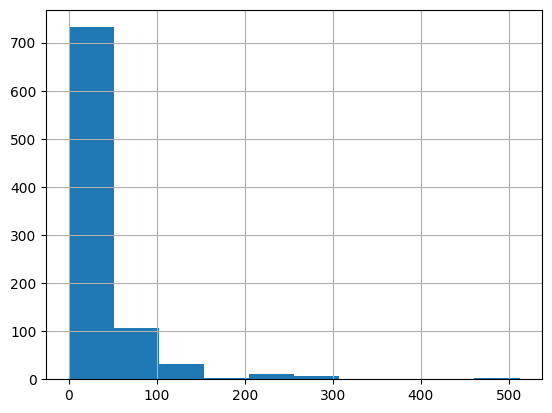

In [11]:
df['Fare'].hist()

When dealing with money, it's often beneficial to take `log` since money behaves in compounding fashion.

If dealing with even extreme values, use `log log` i.e. double `log`.

In [12]:
df['LogFare'] = np.log(df['Fare']+1)

<Axes: >

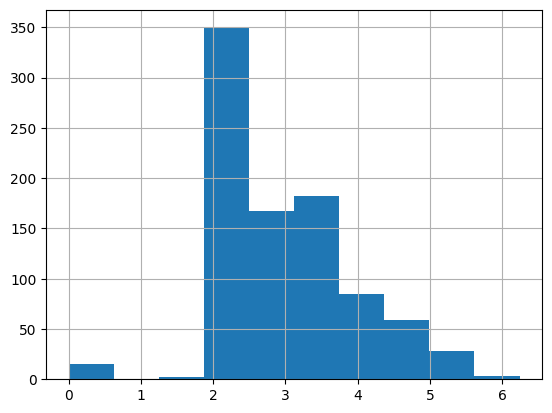

In [13]:
df['LogFare'].hist()

In [14]:
df.Pclass.unique()

array([3, 1, 2])

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'LogFare'],
      dtype='object')

In [16]:
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'], dtype=np.float64)
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [17]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [18]:
df[added_cols]

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
887,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
t_dep = torch.tensor(df.Survived)

In [20]:
t_dep

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [21]:
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols

t_indep = torch.tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

In [22]:
t_indep.shape

torch.Size([891, 12])

In [23]:
t_dep.shape

torch.Size([891])

In [24]:
torch.manual_seed(41)

n_coeff = t_indep.shape[1]
n_coeff

12

In [25]:
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.2636, -0.2734,  0.3005, -0.3308, -0.2350,  0.2720, -0.3718,  0.2452,
         0.3045,  0.1357,  0.0896,  0.1933])

In [26]:
t_indep*coeffs

tensor([[ -5.7982,  -0.2734,   0.0000,  ...,   0.0000,   0.0000,   0.1933],
        [-10.0150,  -0.2734,   0.0000,  ...,   0.1357,   0.0000,   0.0000],
        [ -6.8524,  -0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.1933],
        ...,
        [ -6.3253,  -0.2734,   0.6011,  ...,   0.0000,   0.0000,   0.1933],
        [ -6.8524,  -0.0000,   0.0000,  ...,   0.1357,   0.0000,   0.0000],
        [ -8.4337,  -0.0000,   0.0000,  ...,   0.0000,   0.0896,   0.0000]])

In [29]:
vals, indices = t_indep.max(dim=0)
print(vals)
print(indices)

tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000])
tensor([630, 159, 678, 258,   0,   1,   1,   9,   0,   1,   5,   0])


In [31]:
t_indep = t_indep / vals

In [32]:
t_indep

tensor([[0.2750, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.3000, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.3250, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])

In [33]:
t_indep * coeffs

tensor([[-0.0725, -0.0342,  0.0000,  ...,  0.0000,  0.0000,  0.1933],
        [-0.1252, -0.0342,  0.0000,  ...,  0.1357,  0.0000,  0.0000],
        [-0.0857, -0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.1933],
        ...,
        [-0.0791, -0.0342,  0.1002,  ...,  0.0000,  0.0000,  0.1933],
        [-0.0857, -0.0000,  0.0000,  ...,  0.1357,  0.0000,  0.0000],
        [-0.1054, -0.0000,  0.0000,  ...,  0.0000,  0.0896,  0.0000]])

In [38]:
preds = (t_indep*coeffs).sum(axis=1)
preds[:10]

tensor([ 0.0442, -0.3504,  0.5681, -0.2675,  0.0306, -0.0391, -0.8018,  0.0397,
         0.6487,  0.3905])

In [40]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.5086)

In [42]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)

In [43]:
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [44]:
coeffs.requires_grad_()

tensor([-0.2636, -0.2734,  0.3005, -0.3308, -0.2350,  0.2720, -0.3718,  0.2452,
         0.3045,  0.1357,  0.0896,  0.1933], requires_grad=True)

In [45]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.5086, grad_fn=<MeanBackward0>)

In [46]:
loss.backward()

In [47]:
coeffs.grad

tensor([-0.1478, -0.0286, -0.0195, -0.2204, -0.1538, -0.1773, -0.2424, -0.1639,
         0.0752, -0.1257, -0.0662, -0.1392])

In [48]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.2956, -0.0572, -0.0389, -0.4409, -0.3075, -0.3547, -0.4848, -0.3277,
         0.1504, -0.2514, -0.1324, -0.2783])

`grad` values double because it added the gradients a second time. For this reason, after we use the gradients to do a gradient descent step, we need to set them back to zero.

In [49]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4626)


In [50]:
from fastai.data.transforms import RandomSplitter
trn_split, val_split = RandomSplitter(seed=42)(df)

In [51]:
trn_split

(#713) [np.int64(788),np.int64(525),np.int64(821),np.int64(253),np.int64(374),np.int64(98),np.int64(215),np.int64(313),np.int64(281),np.int64(305)...]

In [52]:
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]
len(trn_indep), len(val_indep)

(713, 178)

In [53]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [54]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad():
        update_coeffs(coeffs, lr)

    print(f"{loss:.3f}", end="; ")

In [59]:
def init_coeffs():
    return (torch.rand(n_coeff) - 0.5).requires_grad_()

In [60]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(337)
    coeffs = init_coeffs()
    for i in range(epochs):
        one_epoch(coeffs, lr=lr)

    return coeffs

In [61]:
coeffs = train_model(18, lr=0.2)

0.454; 0.408; 0.366; 0.339; 0.326; 0.320; 0.330; 0.297; 0.304; 0.298; 0.306; 0.279; 0.291; 0.277; 0.295; 0.286; 0.295; 0.290; 

In [62]:
def show_coeffs():
    return dict(zip(indep_cols, coeffs.requires_grad_(False)))

show_coeffs()

{'Age': tensor(0.2133),
 'SibSp': tensor(-0.0383),
 'Parch': tensor(-0.1415),
 'LogFare': tensor(-0.0790),
 'Sex_male': tensor(-0.2772),
 'Sex_female': tensor(0.5667),
 'Pclass_1': tensor(0.2666),
 'Pclass_2': tensor(0.1563),
 'Pclass_3': tensor(0.1111),
 'Embarked_C': tensor(0.1744),
 'Embarked_Q': tensor(0.3097),
 'Embarked_S': tensor(0.2597)}

In [64]:
preds = calc_preds(coeffs, val_indep)

In [65]:
results = val_dep.bool() == (preds > 0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False,  True,  True, False])

In [66]:
results.float().mean()

tensor(0.7921)

In [67]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()

acc(coeffs)

tensor(0.7921)

In [68]:
preds[preds > 1]

tensor([1.0639, 1.0239, 1.0239, 1.0237, 1.0057, 1.0241, 1.0799, 1.0179, 1.0380,
        1.0535, 1.0688, 1.0851, 1.0177, 1.0285, 1.0016, 1.0188, 1.0241, 1.0143,
        1.1692, 1.1081, 1.0477, 1.0790, 1.0321, 1.0359, 1.0037, 1.0369, 1.0863,
        1.2009, 1.0652, 1.0077, 1.0221, 1.0501, 1.1162, 1.0612, 1.0935, 1.0877])

In [69]:
preds[preds < 0]

tensor([-0.0238, -0.0025])

Some prediction of the probability of survival are more than 1 and some are less than 0

In [72]:
def calc_preds(coeffs, indeps):
    return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [75]:
coeffs = train_model(lr=100)

0.509; 0.324; 0.290; 0.203; 0.199; 0.198; 0.197; 0.197; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [76]:
acc(coeffs)

tensor(0.8258)

In [79]:
show_coeffs()

{'Age': tensor(0.2686),
 'SibSp': tensor(-0.0631),
 'Parch': tensor(-0.1870),
 'LogFare': tensor(-0.2418),
 'Sex_male': tensor(-0.1778),
 'Sex_female': tensor(0.2711),
 'Pclass_1': tensor(0.2254),
 'Pclass_2': tensor(0.0270),
 'Pclass_3': tensor(0.0853),
 'Embarked_C': tensor(-0.2363),
 'Embarked_Q': tensor(0.3873),
 'Embarked_S': tensor(0.3965)}